I conducted an Exploratory Data Analysis (EDA) of energy consumption and generation data from 241 countries and regions/regional alliances around the world. In my EDA, I hope to target environmental policy makers who can use my high-level analyses to inform their policies for scaling back on non-renewable energy sources, and examine current progress toward switching to renewable energy sources, based on trends within individual countries. I also would also like to target global environmental organisations like the UN Environment Programme, who may appreciate cross-regional and country analyses on energy consumption and generation.

https://www.kaggle.com/datasets/pranjalverma08/energy-dataset-countrywise-19002021?resource=download

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
pip install kaggle

In [ ]:
!kaggle datasets download -d pranjalverma08/energy-dataset-countrywise-19002021 --unzip -p ./data_energy

Dataset URL: https://www.kaggle.com/datasets/pranjalverma08/energy-dataset-countrywise-19002021
License(s): CC0-1.0
  0% 0.00/2.02M [00:00<?, ?B/s]
100% 2.02M/2.02M [00:00<00:00, 112MB/s]


In [ ]:
folder_path='./data_energy'

csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

world_energy_df = pd.concat(
    (pd.read_csv(os.path.join(folder_path, f)) for f in csv_files),
    ignore_index=True
)

In [ ]:
world_energy_df.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,17239.000000,7152.000000,13589.000000,5.074000e+03,9491.000000,6474.000000,10106.000000,9983.000000,10135.000000,4936.000000,...,4835.000000,7112.000000,4367.000000,6067.000000,1820.000000,4835.000000,4743.000000,4835.000000,7112.000000,4367.000000
mean,1973.609722,23.968662,9.621462,1.841334e+14,14.152412,20.067887,15.282424,4.224858,42.962626,2.094248,...,7.969383,13.952362,36.392106,1.223524,209.910982,0.371352,3.257272,23.392614,53.206260,149.732919
std,34.727666,725.148859,149.031801,1.311620e+16,92.682368,354.470689,176.113214,26.573195,316.803222,5.604580,...,72.336142,60.524479,150.525206,4.396865,5707.382457,1.421771,21.193715,165.083532,239.279519,559.841069
min,1900.000000,-100.000000,-2366.470000,-1.000000e+02,-1225.490000,-100.000000,-3638.516000,-95.005000,-6910.324000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,-10.409000,0.000000,0.000000,0.000000
25%,1946.000000,-5.226250,0.000000,-1.382250e+00,0.000000,-3.816750,0.000000,-0.670000,-0.065000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.481000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1983.000000,2.030000,0.000000,3.718500e+00,0.000000,1.300000,0.000000,2.341000,0.445000,0.019000,...,0.000000,0.000000,0.000000,0.000000,19.732000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2002.000000,9.994500,0.163000,1.152850e+01,1.333000,10.692750,1.384000,6.713000,8.435000,1.595500,...,0.017000,0.000000,0.432000,0.108500,50.064000,0.022000,0.019000,0.191500,0.555000,5.816500
max,2021.000000,44965.754000,3057.952000,9.342930e+17,2093.606000,25500.000000,2795.152000,1458.505000,6502.243000,72.881000,...,2111.177000,1129.198000,2306.786000,56.840000,242329.182000,24.601000,430.975000,3925.718000,3588.088000,6965.521000


In [ ]:
world_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17239 entries, 0 to 17238
Columns: 128 entries, iso_code to wind_energy_per_capita
dtypes: float64(125), int64(1), object(2)
memory usage: 16.8+ MB


In [ ]:
world_energy_df.columns

Index(['iso_code', 'country', 'year', 'coal_prod_change_pct',
       'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct',
       ...
       'solar_consumption', 'solar_elec_per_capita', 'solar_energy_per_capita',
       'wind_share_elec', 'wind_cons_change_pct', 'wind_share_energy',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_energy_per_capita'],
      dtype='object', length=128)

In [ ]:
world_energy_df.isna().head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,True,False,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,True,False,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,True,False,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,True,False,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True


# **Data Cleaning**
To centre my analysis on countries and do cross-country comparisons, I will remove the data for regional alliances by only including countries currently recognized by the ISO 3166-1 standard.

In [ ]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 80.7 MB/s eta 0:00:00


In [ ]:
import pycountry

In [ ]:
#list of all currently recognized countries and territories from pycountry library
current_countries = {country.alpha_3 for country in pycountry.countries}

In [ ]:
#cross-check with list to only include current countries in my dataframe
current_world_df = world_energy_df[world_energy_df['iso_code'].isin(current_countries)]

In [ ]:
#renewables sorted from top to bottom
renewables_sorted_df = current_world_df.groupby('country')['renewables_electricity'].mean().sort_values(ascending=False)
renewables_sorted_df

,renewables_electricity
country,
China,406.723125
United States,388.836123
Canada,307.662684
Brazil,247.939579
Russia,171.209027
...,...
Northern Mariana Islands,NaN
Saint Helena,NaN
Timor,NaN


# **Global-Level Analyses**


**World Energy Source Distribution**

In [ ]:
world_data_df = world_energy_df[world_energy_df['country'] == 'World']
world_data_df

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
7146,OWID_WRL,World,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7147,OWID_WRL,World,1901,1.808,96.707,10.817,7.988,11.870,27.889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7148,OWID_WRL,World,1902,2.420,131.829,9.761,7.988,8.580,22.551,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7149,OWID_WRL,World,1903,9.122,508.837,8.893,7.988,6.887,19.655,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7150,OWID_WRL,World,1904,0.509,30.981,8.167,7.988,12.292,37.495,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,OWID_WRL,World,2017,2.525,1075.229,3.495,1241.442,0.246,125.290,1.827,...,1115.136,58.728,147.736,4.570,17.810,1.827,430.975,2850.780,150.624,377.678
7264,OWID_WRL,World,2018,5.073,2215.257,4.805,1766.422,2.242,1143.672,2.546,...,1433.944,74.406,187.908,4.906,10.680,1.972,304.464,3155.244,166.219,413.472
7265,OWID_WRL,World,2019,1.625,745.650,3.202,1233.554,-0.138,-72.155,0.934,...,1752.961,90.037,227.260,5.401,11.297,2.174,356.455,3511.699,184.104,455.268
7266,OWID_WRL,World,2020,-4.916,-2292.241,-3.082,-1225.490,-6.987,-3638.516,-4.278,...,2111.177,107.075,270.844,6.079,11.790,2.539,414.019,3925.718,203.590,503.633


<Figure size 2000x600 with 0 Axes>

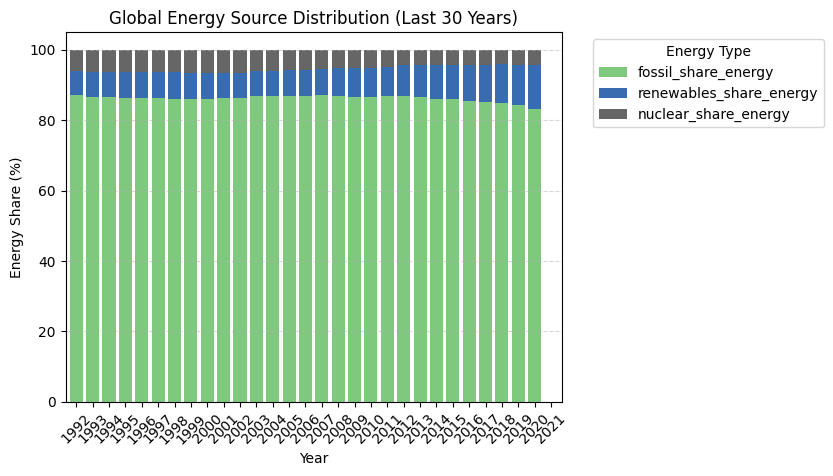

In [ ]:
#energy source distribution around the world

#category definition and aggregation of recent 30 years of data: rows = year, column = summed energy shares
energy_categories = ['fossil_share_energy', 'renewables_share_energy', 'nuclear_share_energy']
energy_over_years = world_data_df.tail(30).groupby('year')[energy_categories].sum()

#create stacked bar chart
plt.figure(figsize=(20, 6))
energy_over_years.plot(kind='bar', stacked=True, colormap='Accent', width=0.8)

#customisation
plt.xlabel('Year')
plt.ylabel('Energy Share (%)')
plt.title('Global Energy Source Distribution (Last 30 Years)')
plt.legend(title="Energy Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()





I found that the share of renewable energy generated by countries seemed to increase post 2010, eating into the share of nuclear energy and fossil energy shares.



**Greenhouse Gas Emissions v.s. Renewable Electricity Generation by Country**

In [ ]:
#Greenhouse Gas Emissions from highest to lowest
gh_gas = current_world_df.groupby('country')['greenhouse_gas_emissions'].mean().sort_values(ascending=False)
gh_gas

,greenhouse_gas_emissions
country,
China,2739.467727
United States,1917.024091
India,678.945455
Japan,477.317727
Russia,370.989545
...,...
Northern Mariana Islands,NaN
Saint Helena,NaN
Timor,NaN


Text(0.5, 1.0, 'Top 20 Countries Sorted By Average Renewable Electricity Generation')

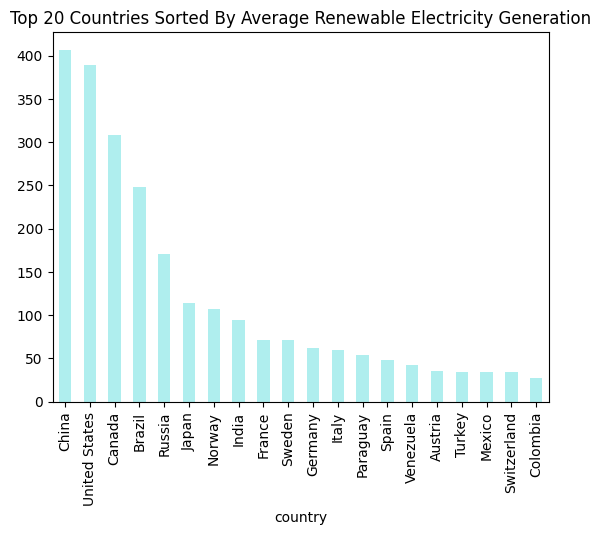

In [ ]:
#taking the top 20 of the sorted renewable averages
renew_top = renewables_sorted_df.head(20)
renew_top.plot(kind='bar', color='paleturquoise')
plt.title("Top 20 Countries Sorted By Average Renewable Electricity Generation")

Text(0.5, 1.0, 'Top 20 Countries Sorted By Average Fossil Share Energy')

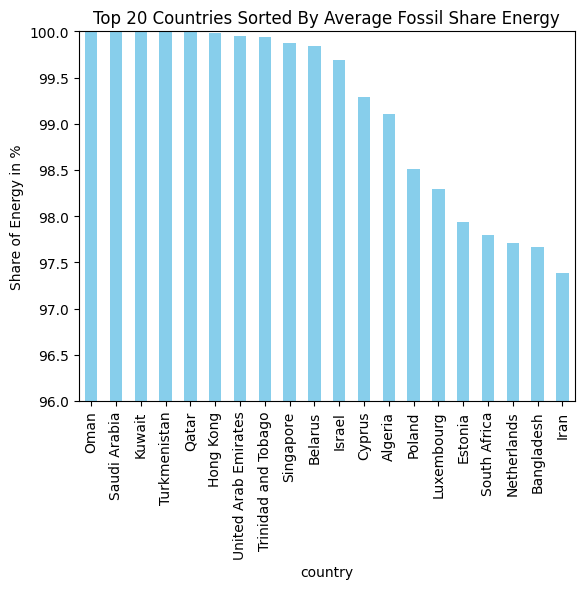

In [ ]:
#sort highest to lowest mean fossil share energy (share of energy use that is fossil fuels) by country
fossil_share_sorted = current_world_df.groupby('country')['fossil_share_energy'].mean().sort_values(ascending=False)
fossil_share_top = fossil_share_sorted.head(20)
fossil_share_top.plot(kind='bar', color = 'skyblue')
plt.ylim(96, 100)
plt.ylabel("Share of Energy in %" )
plt.title("Top 20 Countries Sorted By Average Fossil Share Energy")


This graph shows the top 20 countries in terms of their average fossil share energy. It seems that the top 5 countries, which garner almost 100% of their electricity from fossil fuels are located in the Middle East. It is important to note that many countries in the top 20 here, are also notably small, like Singapore, Hong Kong, and Luxembourg.

Text(0, 0.5, 'Share of Energy in %')

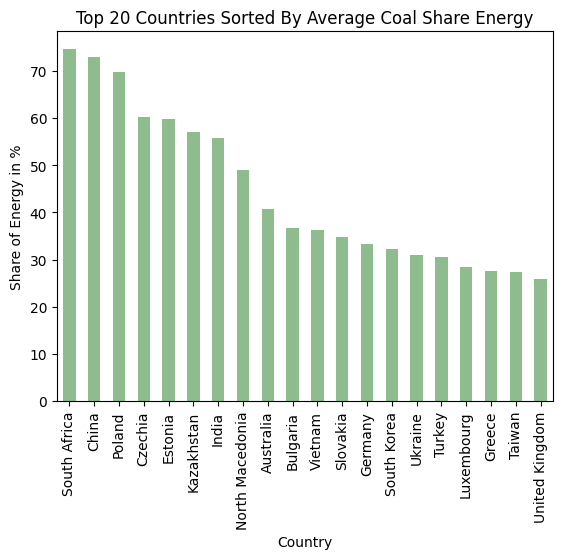

In [ ]:
#sort highest to lowest mean coal share energy (share of energy use that is coal) by country
coal_share_sorted = current_world_df.groupby('country')['coal_share_energy'].mean().sort_values(ascending=False)
coal_share_top = coal_share_sorted.head(20)
coal_share_top.plot(kind='bar', color='darkseagreen')
plt.title("Top 20 Countries Sorted By Average Coal Share Energy")
plt.xlabel("Country")
plt.ylabel("Share of Energy in %")

I observed that there isn't a great overlap in the top 20 countries that have the highest share of fossil energy usage and coal energy usage, despite coal energy being a prominent fossil fuel source.

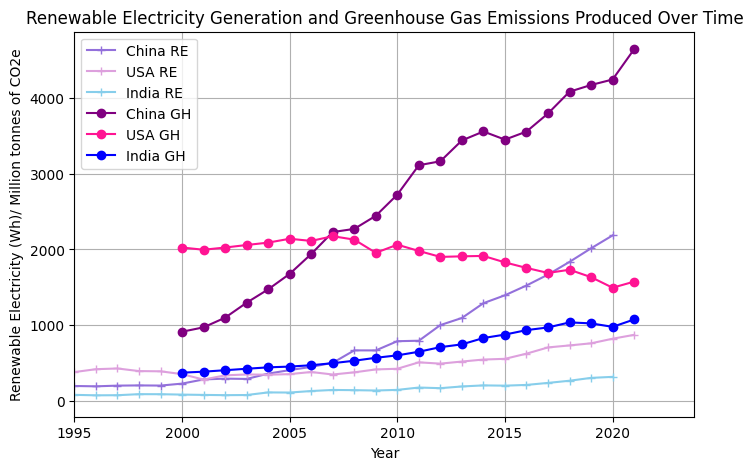

In [ ]:
# do time series of renewables generation for china
china_renew = current_world_df[current_world_df['country'] == 'China']
china_renew_ts = china_renew.set_index('year')['renewables_electricity']
usa_renew_ts = current_world_df[current_world_df['country'] == 'United States'].set_index('year')['renewables_electricity']
india_renew_ts = current_world_df[current_world_df['country'] == 'India'].set_index('year')['renewables_electricity']

# mask for each country, set the index of series to year, only take ghg column
china_gh_ts = current_world_df[current_world_df['country'] == 'China'].set_index('year')['greenhouse_gas_emissions']
usa_gh_ts = current_world_df[current_world_df['country'] == 'United States'].set_index('year')['greenhouse_gas_emissions']
india_gh_ts = current_world_df[current_world_df['country'] == 'India'].set_index('year')['greenhouse_gas_emissions']

plt.figure(figsize=(8, 5))
plt.plot(china_renew_ts, marker='+', linestyle='-', color='mediumpurple', label='China RE')
plt.plot(usa_renew_ts, marker='+', linestyle='-', color='plum', label='USA RE')
plt.plot(india_renew_ts, marker='+', linestyle='-', color='skyblue', label='India RE')

plt.plot(china_gh_ts, marker='o', linestyle='-', color='purple', label='China GH')
plt.plot(usa_gh_ts, marker='o', linestyle='-', color='deeppink', label='USA GH')
plt.plot(india_gh_ts, marker='o', linestyle='-', color='blue', label='India GH')

plt.xlim(1995)

# plot formatting
plt.xlabel('Year')
plt.ylabel('Renewable Electricity (Wh)/ Million tonnes of CO2e')
plt.title('Renewable Electricity Generation and Greenhouse Gas Emissions Produced Over Time')
plt.legend()
plt.grid(True)



Beginning in the early 2000s, China, USA, and India's renewable electricity energy generation increased. However, China's reported renewable electricity generation exponentially increased compared to the other two countries. Hence, it will be important to look into what regulations China had at the time and how it was able to catalyze renewable energy usage. Interestingly, the US seems to have been a leader in renewable electricity generation, using renewable energy since before the 70s. The graph also shows that the US' GHG emissions are declining, while that for China and India are increasing. On the other hand, renewable energy generation is increasing for all 3 countries. It seems the switch to renewable energy is only generating fruitful results for the US though, as their GHG emissions show a notable decline.

In [ ]:
#Compute Renewable to Fossil Energy Ratio

#new column creation
current_world_df.loc["renewables_to_fossil_ratio"] =  current_world_df["renewables_share_energy"]/current_world_df["fossil_share_energy"]

<ipython-input-24-ec33b0cde198>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_world_df.loc["renewables_to_fossil_ratio"] =  current_world_df["renewables_share_energy"]/current_world_df["fossil_share_energy"]


In [ ]:
world_energy_df.columns

Index(['iso_code', 'country', 'year', 'coal_prod_change_pct',
       'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct',
       ...
       'solar_consumption', 'solar_elec_per_capita', 'solar_energy_per_capita',
       'wind_share_elec', 'wind_cons_change_pct', 'wind_share_energy',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_energy_per_capita'],
      dtype='object', length=128)

Text(0.5, 1.0, 'Top 20 Countries Sorted By Renewable to Fossil Share Energy Ratio')

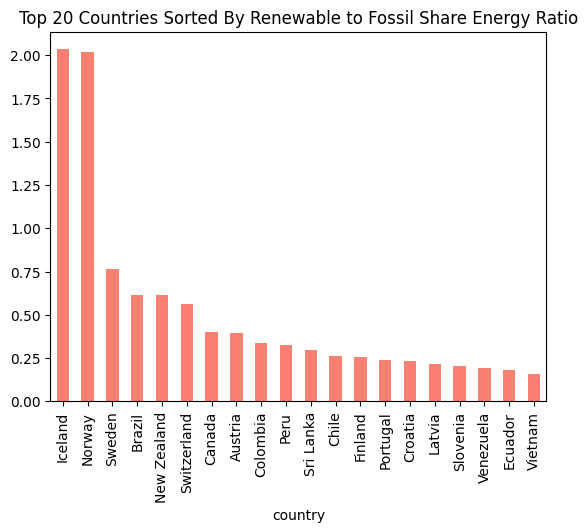

In [ ]:
#group data by country and calculate mean and sort from highest to lowest ratio
foss_rat_sorted = current_world_df.groupby('country')['renewables_to_fossil_ratio'].mean().sort_values(ascending=False)
foss_rat_sorted.head(20)

#create bar plot for top 20 countries
foss_rat_sorted.head(20).plot(kind='bar', color='salmon')
plt.title("Top 20 Countries Sorted By Renewable to Fossil Share Energy Ratio")

This graph shows us that Scandanavian countries like Iceland and Norway are leading the way in using renewable energy as their primary energy source, with Iceland and Norway using more than double the amount of renewable energies compared to fossil fuels. Though I found earlier that China is the leader in renewable energy generation, their ratio is still not comparable to that of the top 20 countries in their comparative usage of renewable to fossil energies.

**Electricity Demand and Generation**

<ipython-input-27-1e64ae6e7111>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_world_df.loc[:, 'electricity_ratio'] = current_world_df['electricity_demand'] / current_world_df['electricity_generation']


Text(0.5, 1.0, 'Top 10 Countries for Electricity Demand to Generation Ratio')

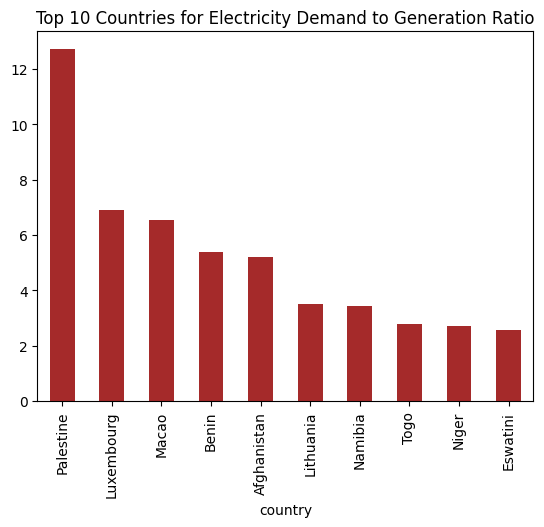

In [ ]:
#ratio: electricity demanded/generated
current_world_df.loc[:, 'electricity_ratio'] = current_world_df['electricity_demand'] / current_world_df['electricity_generation']

# don't want nulls or infinity
elec_dropna = current_world_df.dropna(subset=['electricity_ratio'])
elec_dropna = elec_dropna[elec_dropna['electricity_generation'] != 0]
elec_dropna = elec_dropna[(elec_dropna['year'] >= 2015) & (elec_dropna['year'] <= 2020)]
elec_series1 = elec_dropna.groupby('country')['electricity_ratio'].mean().sort_values(ascending=False).head(10)
elec_series1.plot(kind='bar', color = 'brown')
plt.title('Top 10 Countries for Electricity Demand to Generation Ratio')



These countries are not meeting electricity demanded by its citizens, on average.

Text(0.5, 1.0, 'Bottom 10 Countries for Electricity Demand to Generation Ratio')

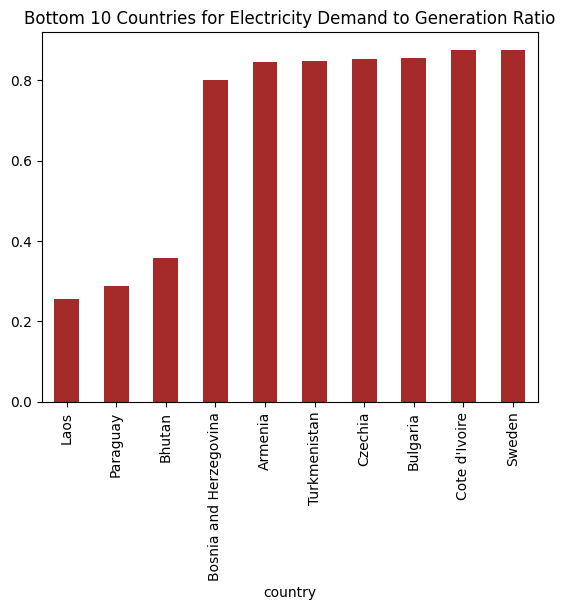

In [ ]:
elec_series2 = elec_dropna.groupby('country')['electricity_ratio'].mean().sort_values(ascending=True).head(10)
elec_series2.plot(kind='bar', color = 'brown')
plt.title('Bottom 10 Countries for Electricity Demand to Generation Ratio')


On the other hand, these countries are generating more electricity than is demanded by their citizens. The interpretation of this could be positive or negative; it would be negative if the country does not have any means of dealing with the excess (generating more greenhouse gases while the energy is not needed is not great).

**GDP's Correlation with Renewable and Non-Renewable Energy Consumption**

In [ ]:
#Download latest version
!kaggle datasets download -d samithsachidanandan/gdp-by-country-1960-2023 --unzip -p ./data_gdp

Dataset URL: https://www.kaggle.com/datasets/samithsachidanandan/gdp-by-country-1960-2023
License(s): world-bank
  0% 0.00/80.1k [00:00<?, ?B/s]
100% 80.1k/80.1k [00:00<00:00, 59.2MB/s]


In [ ]:
gdp_df = pd.read_csv('./data_gdp/All Countries and Economies GDP (US) 1960-2023.csv')

In [ ]:
gdp_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.421063e+10,2.496398e+10,2.707880e+10,3.177575e+10,3.028579e+10,3.381317e+10,...,9.787080e+11,8.982780e+11,8.289430e+11,9.729990e+11,1.012310e+12,1.009720e+12,9.333920e+11,1.085750e+12,1.191420e+12,1.245470e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.723305e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.190495e+10,1.270788e+10,1.363076e+10,1.446909e+10,1.580376e+10,1.692109e+10,...,8.974160e+11,7.717670e+11,6.943610e+11,6.878490e+11,7.704950e+11,8.264840e+11,7.898020e+11,8.493120e+11,8.839740e+11,7.991060e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359670e+11,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.044000e+11,8.482465e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.074395e+09,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.413404e+09,9.354903e+09,1.046822e+10
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.052610e+11,3.893300e+11,3.379750e+11,4.208870e+11,4.069200e+11,3.806990e+11
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,6.987397e+08,6.823597e+08,6.792797e+08,7.043397e+08,8.226397e+08,1.061200e+09,...,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.813776e+10,2.209642e+10,2.916378e+10,2.757796e+10


In [ ]:
#dropping unnecessary columns
gdp_df_clean = gdp_df.drop(['Indicator Code','Indicator Name'], axis=1)

In [ ]:
gdp_df_clean

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09
1,Africa Eastern and Southern,AFE,2.421063e+10,2.496398e+10,2.707880e+10,3.177575e+10,3.028579e+10,3.381317e+10,3.693497e+10,3.845217e+10,...,9.787080e+11,8.982780e+11,8.289430e+11,9.729990e+11,1.012310e+12,1.009720e+12,9.333920e+11,1.085750e+12,1.191420e+12,1.245470e+12
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.723305e+10
3,Africa Western and Central,AFW,1.190495e+10,1.270788e+10,1.363076e+10,1.446909e+10,1.580376e+10,1.692109e+10,1.803417e+10,1.649375e+10,...,8.974160e+11,7.717670e+11,6.943610e+11,6.878490e+11,7.704950e+11,8.264840e+11,7.898020e+11,8.493120e+11,8.839740e+11,7.991060e+11
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359670e+11,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.044000e+11,8.482465e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.074395e+09,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.413404e+09,9.354903e+09,1.046822e+10
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,...,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.052610e+11,3.893300e+11,3.379750e+11,4.208870e+11,4.069200e+11,3.806990e+11
264,Zambia,ZMB,6.987397e+08,6.823597e+08,6.792797e+08,7.043397e+08,8.226397e+08,1.061200e+09,1.239000e+09,1.340639e+09,...,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.813776e+10,2.209642e+10,2.916378e+10,2.757796e+10


In [ ]:
# wide to long, from one country per row to a new dataframe with country name, code, by year, and a new column for GDP
non_year_cols = ['Country Name', 'Country Code']
gdp_melted = gdp_df_clean.melt(id_vars=non_year_cols, var_name='year', value_name='gdp')
gdp_melted['year'] = gdp_melted['year'].astype(int) #year stored as integer

In [ ]:
# merge two data frames, year from both, iso-code from current world and country-code from gdp dataframe, left so keeps rows from current world
world_energy_pop_df = pd.merge(current_world_df, gdp_melted,
                                             left_on=["iso_code", "year"],
                                             right_on=["Country Code", "year"],
                                             how="left")

In [ ]:
world_energy_df[['country', 'year', 'gdp']]

,country,year,gdp
0,Saint Kitts and Nevis,1980,NaN
1,Saint Kitts and Nevis,1981,NaN
2,Saint Kitts and Nevis,1982,NaN
3,Saint Kitts and Nevis,1983,NaN
4,Saint Kitts and Nevis,1984,NaN
...,...,...,...
17234,United States Virgin Islands,2016,NaN
17235,United States Virgin Islands,2017,NaN
17236,United States Virgin Islands,2018,NaN
17237,United States Virgin Islands,2019,NaN


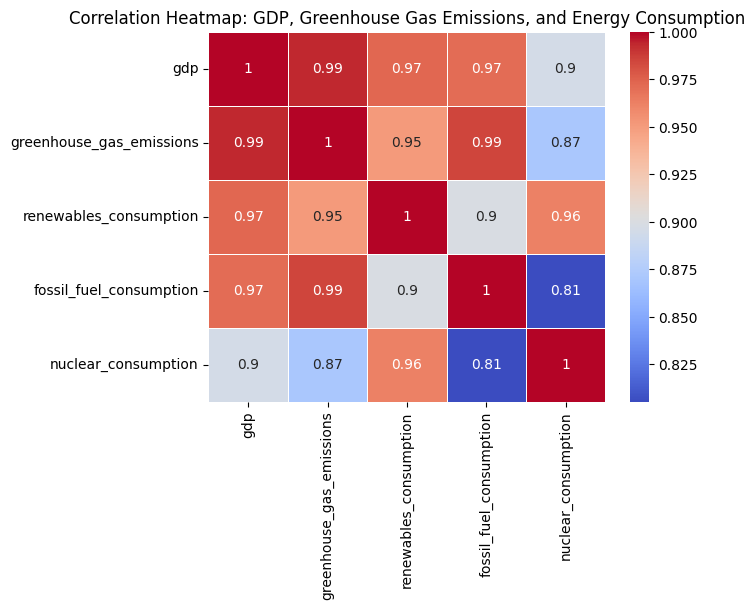

In [ ]:
#Correlation between GDP and Greenhouse gas emissions, renewable energy share, fossil energy share, and nuclear energy share
selected_country = "China"

country_data = current_world_df[current_world_df['country'] == selected_country]

#drop countries without gdp and GHG emissions data and exclude countries that have negative or 0 as their recorded GDP
country_data = country_data.dropna(subset=['gdp', 'greenhouse_gas_emissions'])
country_data = country_data[country_data['gdp'] > 0]

#factors to explore in relation to gdp
correlation_data = country_data[['gdp', 'greenhouse_gas_emissions', 'renewables_consumption', 'fossil_fuel_consumption','nuclear_consumption']]

correlation_matrix = correlation_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: GDP, Greenhouse Gas Emissions, and Energy Consumption')
plt.show()


As expected, GDP is highly positively correlated with greenhouse gas emissions and consumption of renewable, fossil fuel, and nuclear energies. This correlation is the strongest with GDP and greenhouse gas emissions; richer countries are also the ones with the capability to further develop renewable energy sources and also need more fossil fuels in order to sustain their economies. Nuclear energy has the lowest correlation comparatively, though it is still strongly positively correlated to GDP.

**Country-Level Analyses**

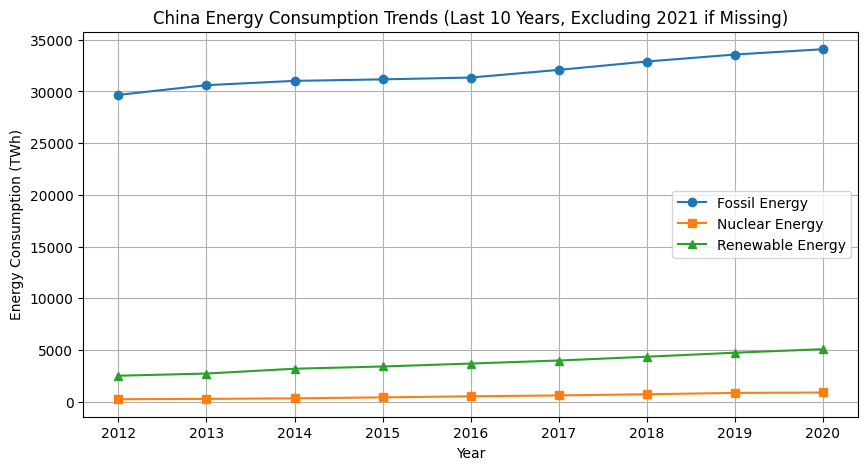

In [ ]:
#Energy Consumption for fossil, nuclear, and renewable energy across the countries with top 3 greenhouse gas emissions
country_name = "China"  # Change to any country

#filter
country_energy_df = current_world_df[current_world_df["country"] == country_name]

#convert unique years and sorts in ascending order
latest_years = country_energy_df["year"].dropna().astype(int).unique()
latest_years.sort()

#If 2021 is missing, use last 10 available years, if 2021 is present, use last 10 years excluding 2021, to compare to other countries
if 2021 not in latest_years:
    recent_10_years = latest_years[-10:]
else:
    recent_10_years = [year for year in latest_years[-10:] if year != 2021]  # Exclude 2021 if missing, most seem to be missing this data


energy_columns = {
    "fossil": ["coal_consumption", "oil_consumption", "gas_consumption"],
    "nuclear": ["nuclear_consumption"],
    "renewable": ["solar_consumption", "wind_consumption", "hydro_consumption", "biofuel_consumption"]}

#filter data for the recent 10 years
filtered_data_country = country_energy_df[country_energy_df["year"].isin(recent_10_years)][["year"] +
                                                                                           sum(energy_columns.values(), [])]

#sum the row data from aforementioned columns and ignore NaNs
filtered_data_country["fossil_energy"] = filtered_data_country[energy_columns["fossil"]].sum(axis=1, skipna=True)
filtered_data_country["nuclear_energy"] = filtered_data_country[energy_columns["nuclear"]].sum(axis=1, skipna=True)
filtered_data_country["renewable_energy"] = filtered_data_country[energy_columns["renewable"]].sum(axis=1, skipna=True)

final_data_country = filtered_data_country[["year", "fossil_energy", "nuclear_energy", "renewable_energy"]].dropna()

plt.figure(figsize=(10, 5))
plt.plot(final_data_country["year"], final_data_country["fossil_energy"], label="Fossil Energy", marker='o', linestyle='-')
plt.plot(final_data_country["year"], final_data_country["nuclear_energy"], label="Nuclear Energy", marker='s', linestyle='-')
plt.plot(final_data_country["year"], final_data_country["renewable_energy"], label="Renewable Energy", marker='^', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Energy Consumption (TWh)")
plt.title(f"{country_name} Energy Consumption Trends (Last 10 Years, Excluding 2021 if Missing)")
plt.legend()
plt.grid(True)

plt.show()


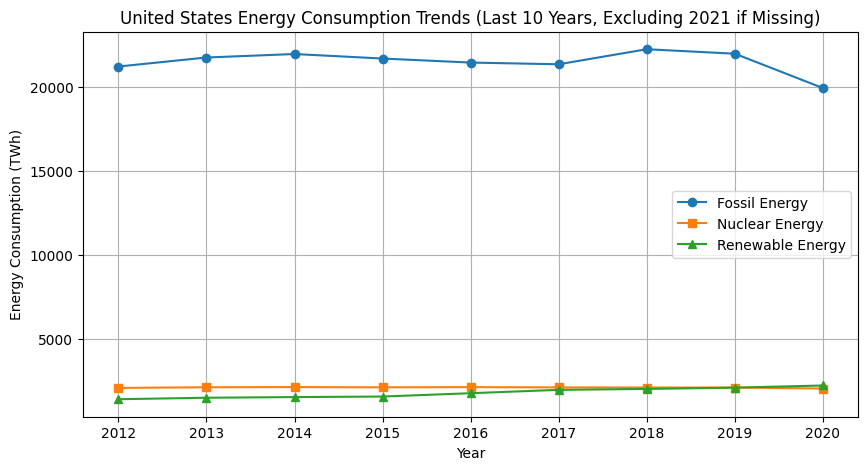

In [ ]:
country_name = 'United States'

country_energy_df = current_world_df[current_world_df["country"] == country_name]

latest_years = country_energy_df["year"].dropna().astype(int).unique()
latest_years.sort()

if 2021 not in latest_years:
    recent_10_years = latest_years[-10:]
else:
    recent_10_years = [year for year in latest_years[-10:] if year != 2021]

energy_columns = {
    "fossil": ["coal_consumption", "oil_consumption", "gas_consumption"],
    "nuclear": ["nuclear_consumption"],
    "renewable": ["solar_consumption", "wind_consumption", "hydro_consumption", "biofuel_consumption"]
}

filtered_data_country = country_energy_df[country_energy_df["year"].isin(recent_10_years)][["year"] +
                                                                                           sum(energy_columns.values(), [])]
filtered_data_country["fossil_energy"] = filtered_data_country[energy_columns["fossil"]].sum(axis=1, skipna=True)
filtered_data_country["nuclear_energy"] = filtered_data_country[energy_columns["nuclear"]].sum(axis=1, skipna=True)
filtered_data_country["renewable_energy"] = filtered_data_country[energy_columns["renewable"]].sum(axis=1, skipna=True)

final_data_country = filtered_data_country[["year", "fossil_energy", "nuclear_energy", "renewable_energy"]].dropna()

plt.figure(figsize=(10, 5))
plt.plot(final_data_country["year"], final_data_country["fossil_energy"], label="Fossil Energy", marker='o', linestyle='-')
plt.plot(final_data_country["year"], final_data_country["nuclear_energy"], label="Nuclear Energy", marker='s', linestyle='-')
plt.plot(final_data_country["year"], final_data_country["renewable_energy"], label="Renewable Energy", marker='^', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Energy Consumption (TWh)")
plt.title(f"{country_name} Energy Consumption Trends (Last 10 Years, Excluding 2021 if Missing)")
plt.legend()
plt.grid(True)

plt.show()

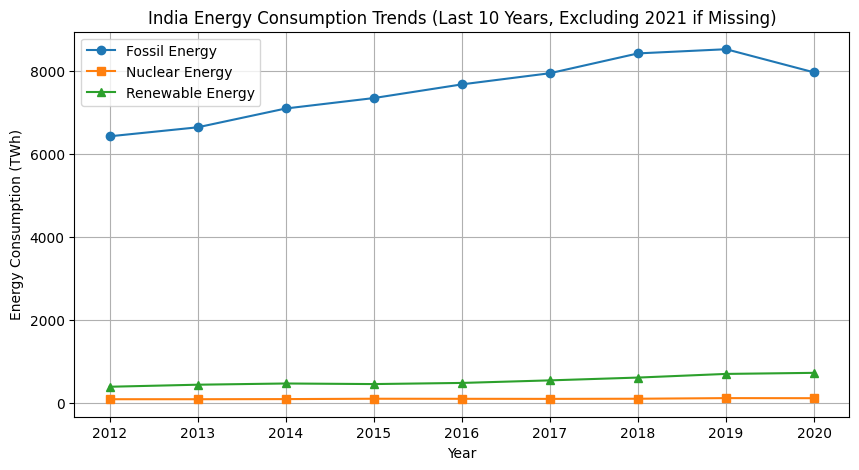

In [ ]:
country_name = "India"

country_energy_df = current_world_df[current_world_df["country"] == country_name]

latest_years = country_energy_df["year"].dropna().astype(int).unique()
latest_years.sort()

if 2021 not in latest_years:
    recent_10_years = latest_years[-10:]
else:
    recent_10_years = [year for year in latest_years[-10:] if year != 2021]

energy_columns = {
    "fossil": ["coal_consumption", "oil_consumption", "gas_consumption"],
    "nuclear": ["nuclear_consumption"],
    "renewable": ["solar_consumption", "wind_consumption", "hydro_consumption", "biofuel_consumption"]}

filtered_data_country = country_energy_df[country_energy_df["year"].isin(recent_10_years)][["year"] + sum(energy_columns.values(), [])]
filtered_data_country["fossil_energy"] = filtered_data_country[energy_columns["fossil"]].sum(axis=1, skipna=True)
filtered_data_country["nuclear_energy"] = filtered_data_country[energy_columns["nuclear"]].sum(axis=1, skipna=True)
filtered_data_country["renewable_energy"] = filtered_data_country[energy_columns["renewable"]].sum(axis=1, skipna=True)

final_data_country = filtered_data_country[["year", "fossil_energy", "nuclear_energy", "renewable_energy"]].dropna()

plt.figure(figsize=(10, 5))
plt.plot(final_data_country["year"], final_data_country["fossil_energy"], label="Fossil Energy", marker='o', linestyle='-')
plt.plot(final_data_country["year"], final_data_country["nuclear_energy"], label="Nuclear Energy", marker='s', linestyle='-')
plt.plot(final_data_country["year"], final_data_country["renewable_energy"], label="Renewable Energy", marker='^', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Energy Consumption (TWh)")
plt.title(f"{country_name} Energy Consumption Trends (Last 10 Years, Excluding 2021 if Missing)")
plt.legend()
plt.grid(True)

plt.show()

These graphs show me energy consumption trends over the last decade or so for the countries with the highest greenhouse gas emissions. This is a more useful graph for country officials who are looking to explore their energy trends within the country (rather than compare amongst different countries like before).

In my EDA I have found that fossil fuels still dominate the energy industry, with consumption of fossil fuels increasing over the past 10 years in China and India and remaining stagnant at a high level in the United States, the 3 countries with the highest amounts of greenhouse gas emissions. However, there do seem to be efforts to increase usage of renewable energy, specifically China reporting exponential growth in the late 2010s. Although the US and India do not show similar levels of growth, I am able to recognize a gradual increase in these countries as well. Norway and Iceland are leaders in the renewable energy sphere, for their renewable energy share is double that of their fossil energy share. Countries should look to them for guidance on transitioning to a renewable energy dominant economy to promote greater sustainability and combat climate change. It would be interesting to further examine whether there were specific global climate agreements or policies that impacted energy consumption/generation in the last few years, specifically noting when they were implemented, as well as further examine the different, specific sources of renewable and non-renewable energy and trends in their consumption and generation over time. Examining geographic features and climate factors like access to sunlight and wind and exploring their correlation with renewable energy share and consumption would also be important in uncovering future energy generation pathways for countries.